**Import Libraries:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

**Load Data:**

In [2]:
# Load the datasets
edgap = pd.read_excel('../data/EdGap_data.xlsx', dtype={'NCESSCH School ID': object})
school_information = pd.read_csv('../data/ccd_sch_029_1617_w_1a_11212017.csv', encoding='unicode_escape')

pd.set_option('display.max_columns', None)  # Display all columns in the DataFrame
pd.set_option('display.width', None)  # Disable line wrapping for better readability

/var/folders/n3/pcj4k0m94415fgwnccl63v5r0000gn/T/ipykernel_8625/3543914010.py:3: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_information = pd.read_csv('../data/ccd_sch_029_1617_w_1a_11212017.csv', encoding='unicode_escape')


**Interpretation:** Succesfully loaded the EdGap and School Information data into pandas DataFrames 

**Display head of data:**

In [3]:
# Display the first few rows of each dataset
print("EdGap data:")
print(edgap.head())

EdGap data:
  NCESSCH School ID  CT Unemployment Rate  CT Pct Adults with College Degree  \
0      100001600143              0.117962                           0.445283   
1      100008000024              0.063984                           0.662765   
2      100008000225              0.056460                           0.701864   
3      100017000029              0.044739                           0.692062   
4      100018000040              0.077014                           0.640060   

   CT Pct Childre In Married Couple Family  CT Median Household Income  \
0                                 0.346495                     42820.0   
1                                 0.767619                     89320.0   
2                                 0.713090                     84140.0   
3                                 0.641283                     56500.0   
4                                 0.834402                     54015.0   

   School ACT average (or equivalent if SAT score)  \
0       

**Interpretation:** The purpose of the above step is to inspect schema, confirm the data availability.

In [4]:
# Display the first few rows of each dataset
print("\nSchool information data:")
print(school_information.head())


School information data:
  SCHOOL_YEAR  FIPST STATENAME  ST                          SCH_NAME  \
0   2016-2017      1   ALABAMA  AL  Sequoyah Sch - Chalkville Campus   
1   2016-2017      1   ALABAMA  AL                             Camps   
2   2016-2017      1   ALABAMA  AL                           Det Ctr   
3   2016-2017      1   ALABAMA  AL     Wallace Sch - Mt Meigs Campus   
4   2016-2017      1   ALABAMA  AL         McNeel Sch - Vacca Campus   

                 LEA_NAME STATE_AGENCY_NO  UNION ST_LEAID   LEAID  \
0  Alabama Youth Services               1    NaN   AL-210  100002   
1  Alabama Youth Services               1    NaN   AL-210  100002   
2  Alabama Youth Services               1    NaN   AL-210  100002   
3  Alabama Youth Services               1    NaN   AL-210  100002   
4  Alabama Youth Services               1    NaN   AL-210  100002   

      ST_SCHID       NCESSCH     SCHID           MSTREET1 MSTREET2 MSTREET3  \
0  AL-210-0020  1.000020e+10  100277.0       P 

**Interpretation:** The purpose of the above step is to inspect schema, confirm the data availability.

**`info` method to check data types, size of the dataframe and number of missing values:** 

In [5]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


**Interpretation:** From the above result it is understood thatb there are missing vakues in the DataFrame the following columns CT Unemployment, CT Pct Adults with College Degree, CT Pct Childr In Married Couple Family, CT Median Household Income

In [6]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

**Interpretation:** From the above result it is understood that there are missing values in the dataframe under columns like CHARTER_TEXT, LEVEL etc.,

**Pair Plot to explore relationship between variables:**

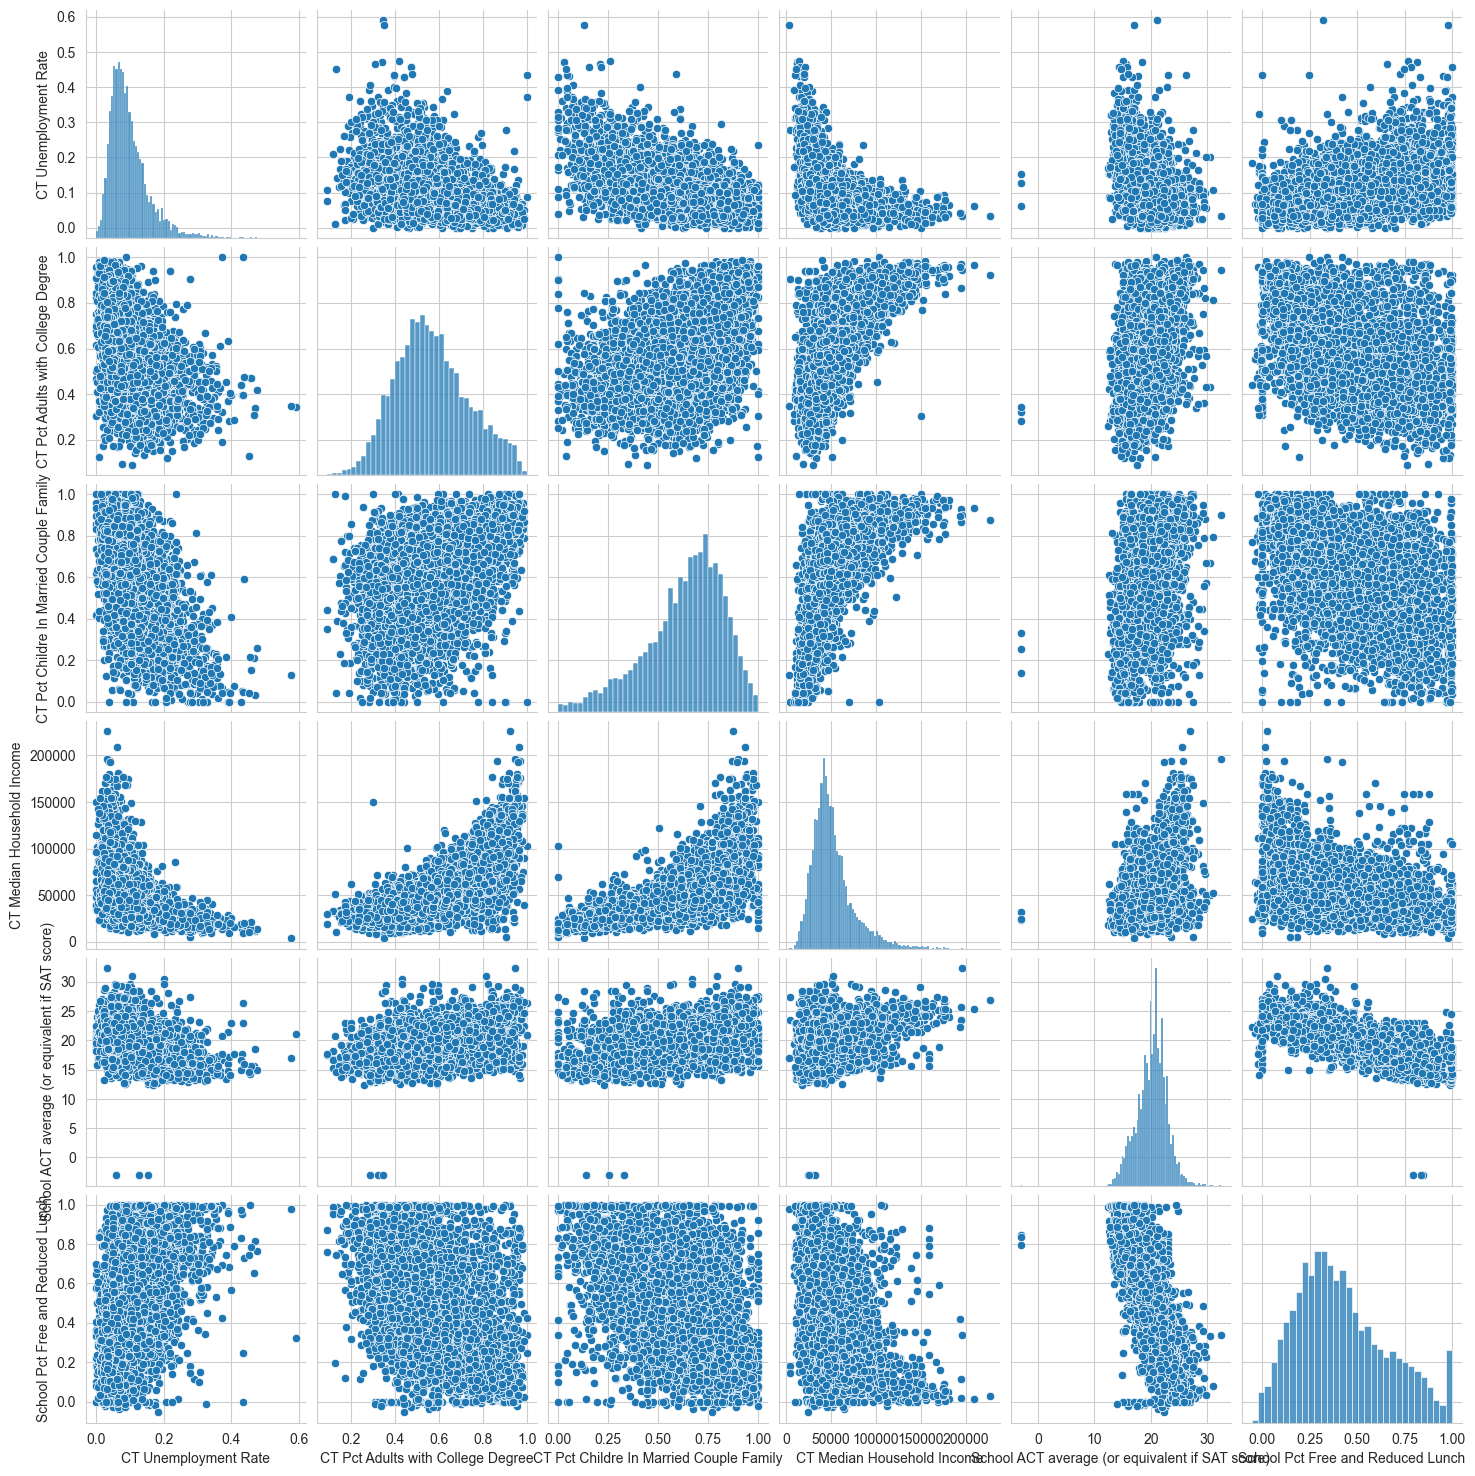

In [7]:
sns.pairplot(edgap.drop(columns='NCESSCH School ID'))
plt.show()

**Interpretation:** It plots all pairwise nmeric relationships in dataset. 

ACT average vs CT Unemployment Rate:
Unemployment rate increases ACT average decreases - negative correlation

ACT average vs CT Median Household Income:
House hold income increases ACT average increases  - positive correlation

ACT average vs CT Pct Adult College Degree:
CT Pct Adult College Degree increases ACT average increases - positive coreelation

ACT average vs CT Pct Children in Married Couple Family:
CT Pct Children in Married Couple Family increases slight increase in ACT average - mild positive correlation

ACT average vs Pct Free ans Reduced Lunch:
Pct Free ans Reduced Lunch increases ACT average decreases - negative correlation.

**Adding regression lines to Pair plot:**

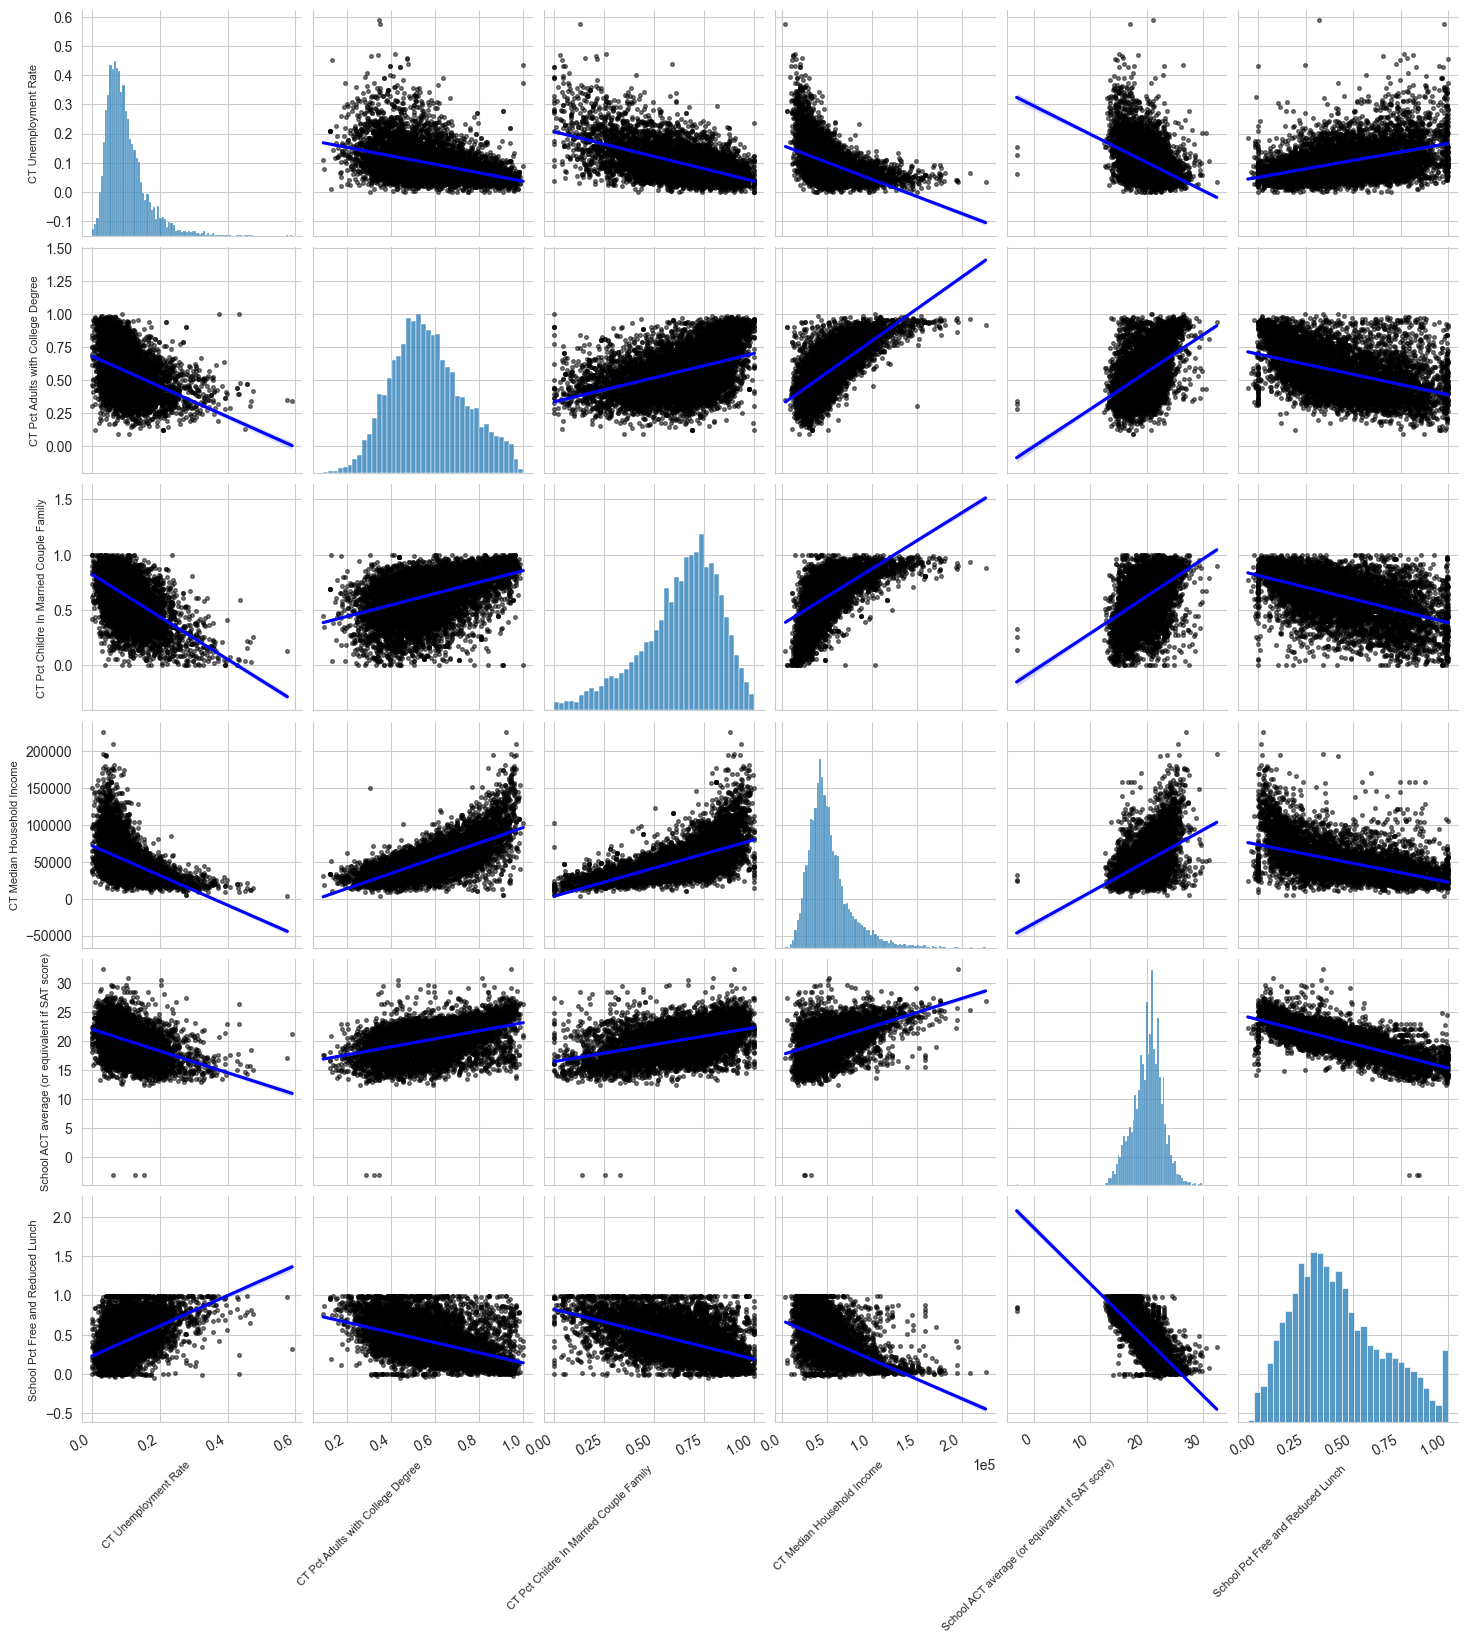

In [8]:
fig = sns.pairplot(edgap.drop(columns='NCESSCH School ID'), kind='reg', plot_kws={'line_kws':{'color':'blue'}, 'scatter_kws': {'alpha':0.5, 'color': 'k', 's': 7}})

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=45, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

**Ploting single row:**

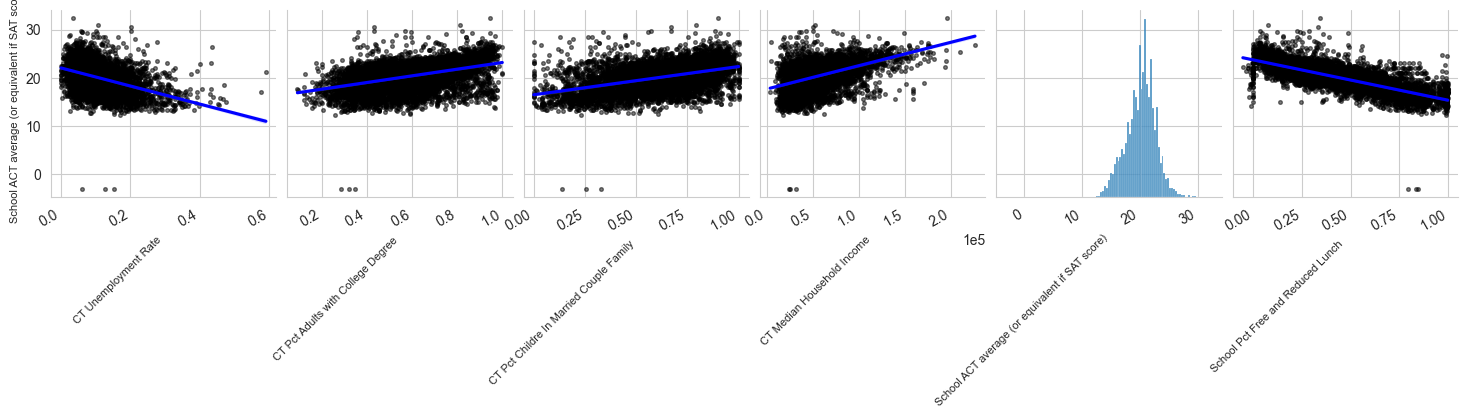

In [9]:
fig = sns.pairplot(edgap.drop(columns='NCESSCH School ID'), y_vars=['School ACT average (or equivalent if SAT score)'], kind='reg', plot_kws={'line_kws':{'color':'blue'}, 'scatter_kws': {'alpha':0.5, 'color': 'k', 's': 7}})

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=45, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

**Interpretation:** 

ACT average vs CT Unemployment Rate:
Unemployment rate increases ACT average decreases - negative correlation

ACT average vs CT Median Household Income:
House hold income increases ACT average increases  - positive correlation

ACT average vs CT Pct Adult College Degree:
CT Pct Adult College Degree increases ACT average increases - positive coreelation

ACT average vs CT Pct Children in Married Couple Family:
CT Pct Children in Married Couple Family increases slight increase in ACT average - mild positive correlation

ACT average vs Pct Free ans Reduced Lunch:
Pct Free ans Reduced Lunch increases ACT average decreases - negative correlation.

**Data Preparation:**

**Selecting relevant subsets of the data:**

In [10]:
school_information = school_information[['SCHOOL_YEAR', 'NCESSCH','LSTATE', 'LZIP','SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT']]
school_information.head()

SCHOOL_YEAR       NCESSCH LSTATE   LZIP       SCH_TYPE_TEXT LEVEL  \
0   2016-2017  1.000020e+10     AL  35220  Alternative School  High   
1   2016-2017  1.000020e+10     AL  36067  Alternative School  High   
2   2016-2017  1.000020e+10     AL  36784  Alternative School  High   
3   2016-2017  1.000020e+10     AL  36057  Alternative School  High   
4   2016-2017  1.000020e+10     AL  35206  Alternative School  High   

  CHARTER_TEXT  
0           No  
1           No  
2           No  
3           No  
4           No

**Interpretation:** Since school information amny columns we are selecting only the required columns i.e 'SCHOOL_YEAR', 'NCESSCH','LSTATE', 'LZIP','SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT'  

**Renaming Columns:**

In [11]:
edgap = edgap.rename(columns={'NCESSCH School ID': 'id',
                              'CT Pct Adults with College Degree': 'percent_college',
                              'CT Unemployment Rate': 'rate_unemployment',
                              'CT Pct Childre In Married Couple Family': 'percent_married',
                              'CT Median Household Income': 'median_income',
                              'School ACT average (or equivalent if SAT score)': 'average_act',
                              'School Pct Free and Reduced Lunch': 'percent_lunch'})

school_information = school_information.rename(columns={'SCHOOL_YEAR': 'year',
                                                         'NCESSCH': 'id',
                                                         'LSTATE': 'state',
                                                         'LZIP': 'zip_code',
                                                         'SCH_TYPE_TEXT': 'school_type',
                                                         'LEVEL': 'school_level',
                                                         'CHARTER_TEXT': 'charter'})


In [12]:
edgap.head()


id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch  
0        42820.0    20.433455       0.066901  
1        89320.0    19.498168       0.112412  
2        84140.0    19.554335       0.096816  
3        56500.0    17.737485       0.296960  
4        54015.0    18.245421       0.262641

In [13]:
school_information.head()

year            id state zip_code         school_type school_level  \
0  2016-2017  1.000020e+10    AL    35220  Alternative School         High   
1  2016-2017  1.000020e+10    AL    36067  Alternative School         High   
2  2016-2017  1.000020e+10    AL    36784  Alternative School         High   
3  2016-2017  1.000020e+10    AL    36057  Alternative School         High   
4  2016-2017  1.000020e+10    AL    35206  Alternative School         High   

  charter  
0      No  
1      No  
2      No  
3      No  
4      No

**Join DataFrames:**

In [14]:
school_information['id'] = school_information['id'].astype(object)
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          102183 non-null  object
 1   id            102181 non-null  object
 2   state         102183 non-null  object
 3   zip_code      102183 non-null  object
 4   school_type   102181 non-null  object
 5   school_level  102179 non-null  object
 6   charter       102179 non-null  object
dtypes: object(7)
memory usage: 5.5+ MB


**Interpretation:** As we nned to join the frames on identity of the school, since that column is of object type in EdGap data frame therefore we are type casting identity of school column in school_information dataframe to object since it is in float64 

In [15]:
df = edgap.merge(school_information, how='left', on='id')
df.head

<bound method NDFrame.head of                 id  rate_unemployment  percent_college  percent_married  \
0     100001600143           0.117962         0.445283         0.346495   
1     100008000024           0.063984         0.662765         0.767619   
2     100008000225           0.056460         0.701864         0.713090   
3     100017000029           0.044739         0.692062         0.641283   
4     100018000040           0.077014         0.640060         0.834402   
...            ...                ...              ...              ...   
7981  560530200294           0.034549         0.590780         0.720077   
7982  560569000311           0.069538         0.633860         0.808841   
7983  560569500360           0.035159         0.764566         0.776570   
7984  560576200324           0.063877         0.670532         0.879324   
7985  560583000335           0.033553         0.736511         0.821128   

      median_income  average_act  percent_lunch       year state zip_

**Interpretation:** The above statement left joins the  data frames EdGap and school_information.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               7898 non-null   object 
 8   state              7898 non-null   object 
 9   zip_code           7898 non-null   object 
 10  school_type        7898 non-null   object 
 11  school_level       7898 non-null   object 
 12  charter            7898 non-null   object 
dtypes: float64(6), object(7)
memory usage: 811.2+ KB


**Quality Control:**


**Checking the minimum and maximum values in each column:**

In [17]:
df.describe()

rate_unemployment  percent_college  percent_married  median_income  \
count        7972.000000      7973.000000      7961.000000    7966.000000   
mean            0.098730         0.568930         0.633440   52026.905222   
std             0.058959         0.165704         0.196764   24228.057079   
min             0.000000         0.091493         0.000000    3589.000000   
25%             0.058655         0.450828         0.523810   36597.250000   
50%             0.085649         0.554979         0.667594   46833.500000   
75%             0.123376         0.676571         0.777135   61369.250000   
max             0.590278         1.000000         1.000000  226181.000000   

       average_act  percent_lunch  
count  7986.000000    7986.000000  
mean     20.181532       0.420651  
std       2.595201       0.239754  
min      -3.070818      -0.054545  
25%      18.600000       0.238501  
50%      20.400000       0.381570  
75%      21.910867       0.575447  
max      32.362637       0.998729

**Interpretation:** It provides the summary statistics for all numeric columns in the DataFrame. From the result average_act and percent_lunch min values are negative looks like invalid values.

In [18]:
df.select_dtypes(include=['number']).agg(['min', 'max']).round(2)

rate_unemployment  percent_college  percent_married  median_income  \
min               0.00             0.09              0.0         3589.0   
max               0.59             1.00              1.0       226181.0   

     average_act  percent_lunch  
min        -3.07          -0.05  
max        32.36           1.00

**Interpretation:** The above statment computes min and max values for numerical columns. From the result average_act and percent_lunch min values are negative looks like invalid values.

**Setting out of range values to NaN using np.nan:**

In [19]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan
df.loc[df['average_act'] < 1, 'average_act'] = np.nan

**Interpretation:** The above steps replaces negative values in precent_lunbch with NaN and average_act less the 1 with NaN

**Checking the types, level and charter status of school:**

In [20]:
df['school_type'].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

**Interpretation:** The data set has more regular schools compared to alternative, special education, career and Technical schools.

In [21]:
df['school_level'].value_counts()

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

**Interpretation:** It has more high schools compared to other other/Not reported/Elementary schools

In [22]:
df['charter'].value_counts()

charter
No                7329
Yes                352
Not applicable     217
Name: count, dtype: int64

**Keeping only the high schools:**

In [23]:
df = df.loc[df['school_level'] == 'High']

**Interpretation:** We are only taking high school records from the dataset.

**Duplicate check:**

In [24]:
df.duplicated().sum()

0

**Interpretation:** No duplicates in the dataset.

**Identify missing values:**

In [25]:
df.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                        12
percent_college                          11
percent_married                          20
median_income                            16
average_act                               3
percent_lunch                            20
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

**Interpretation:** Some of the columns in the dataset has missing values like reate_unemployment, percent_lunch etc., which suggest that we need to do data handling for missing values.

In [26]:
percent_missing = df.isna().mean().round(4) * 100
percent_missing.to_frame(name='Percent Missing Values')

Percent Missing Values
id                                   0.00
rate_unemployment                    0.17
percent_college                      0.15
percent_married                      0.28
median_income                        0.22
average_act                          0.04
percent_lunch                        0.28
year                                 0.00
state                                0.00
zip_code                             0.00
school_type                          0.00
school_level                         0.00
charter                              0.00

**Interpretation:** The above step provides missing values count in percentage.

**Check for different states in the data:**

In [27]:
df['state'].value_counts()

state
TX    913
OH    654
IL    564
PA    543
MI    498
NC    407
FL    404
GA    367
WI    351
NJ    341
MO    337
IN    321
NY    295
TN    265
WA    263
MA    253
KY    198
LA    194
WY     38
DE     24
Name: count, dtype: int64

**Interpretation:** The above rersults states that our dataset have values only from certain states.

In [28]:
df['state'].nunique()

20

**Ploting map:**

In [29]:
import plotly.offline as po
import plotly.graph_objs as pg

layout = dict(geo = {"scope": "usa"}, coloraxis_colorbar=dict(title="Number of Schools"))

data = dict(type="choropleth",
            locations=df['state'].value_counts().index,
            locationmode='USA-states',
            z=df['state'].value_counts().values,
            coloraxis='coloraxis')

x= pg.Figure(data=[data], layout=layout)
po.iplot(x)

**Drop rows where average ACT score is missing:**

In [30]:
df = df.dropna(subset=['average_act'])

**Interpretation:** Since our main focus of analysis is on average act therefore we dont consider data that dont have average act values. we are only interested in data that has average_act values. 

In [31]:
df.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                        12
percent_college                          11
percent_married                          20
median_income                            16
average_act                               0
percent_lunch                            20
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

**Data imputation:**

In [32]:
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch', 'state', 'charter']

**Interpretation:** In the above statement predictor variables are defined

In [33]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [34]:
imputer = IterativeImputer()

In [35]:
numerical_predictors = df[predictor_variables].select_dtypes(include=['number']).columns.to_list()
print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']


**Interpretation:** In the above statement we are defining the columns to use in the imputation process

In [36]:
imputer.fit(df.loc[:,numerical_predictors])

IterativeImputer()

**Interpretation:** The above statement fits the imputer using numerical predictor variables

In [37]:
df.loc[:,numerical_predictors] = imputer.transform(df.loc[:,numerical_predictors])

**Interpretation:** The above statement impute the missing values in the training data

**Checking the missing values:**

In [38]:
df.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                         0
percent_college                           0
percent_married                           0
median_income                             0
average_act                               0
percent_lunch                             0
year                                      0
state                                     0
zip_code                                  0
school_type                               0
school_level                              0
charter                                   0

**Saving the cleaned dataset in csv format inside the data folder:**

In [39]:
df.to_csv('../data/cleaned_education_data.csv', encoding='utf-8-sig', index=False)

In [40]:
df.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch       year state zip_code  \
0        42820.0    20.433455       0.066901  2016-2017    DE    19804   
1        89320.0    19.498168       0.112412  2016-2017    DE    19709   
2        84140.0    19.554335       0.096816  2016-2017    DE    19709   
3        56500.0    17.737485       0.296960  2016-2017    DE    19958   
4        54015.0    18.245421       0.262641  2016-2017    DE    19934   

      school_type school_level charter  
0  Regular School         High     Yes  
1  Regular School         High      No  
2  Regular School         High      No  
3  Regular School         High      No  
4  Regular School         High      No

In [41]:
# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.stats.anova import anova_lm

**Heat Map:**

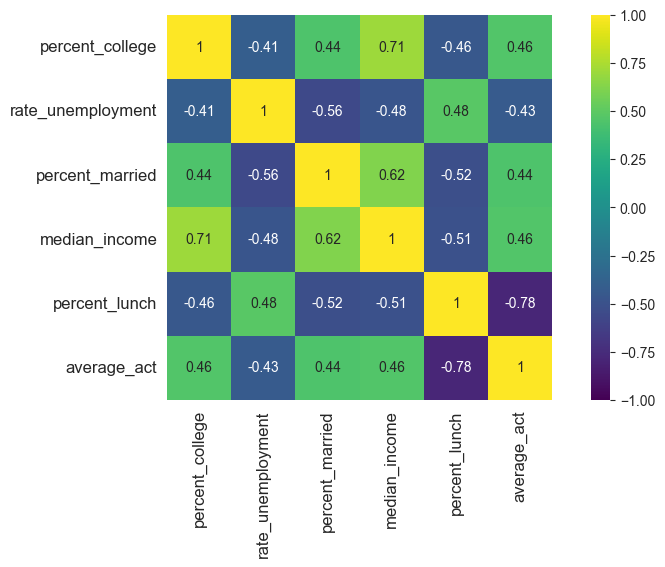

In [42]:
predictors = ['percent_college', 'rate_unemployment', 'percent_married', 'median_income', 'percent_lunch']
numerical_predictors = df[predictors].select_dtypes(include=['number']).columns.to_list()
corr_matrix = df[numerical_predictors+["average_act"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(corr_matrix, vmax=1,vmin=-1, square=True, annot=True, cmap="viridis")
plt.tick_params(labelsize=12)
plt.show()

**Interpretation:** The heatmap displays the correlation between average_act and other variables.

Positive correaltions with Average ACT:
median income, percent college, percent married.
Negative Correlation with Average ACT:
rate_unemployment, percent_lunch
 

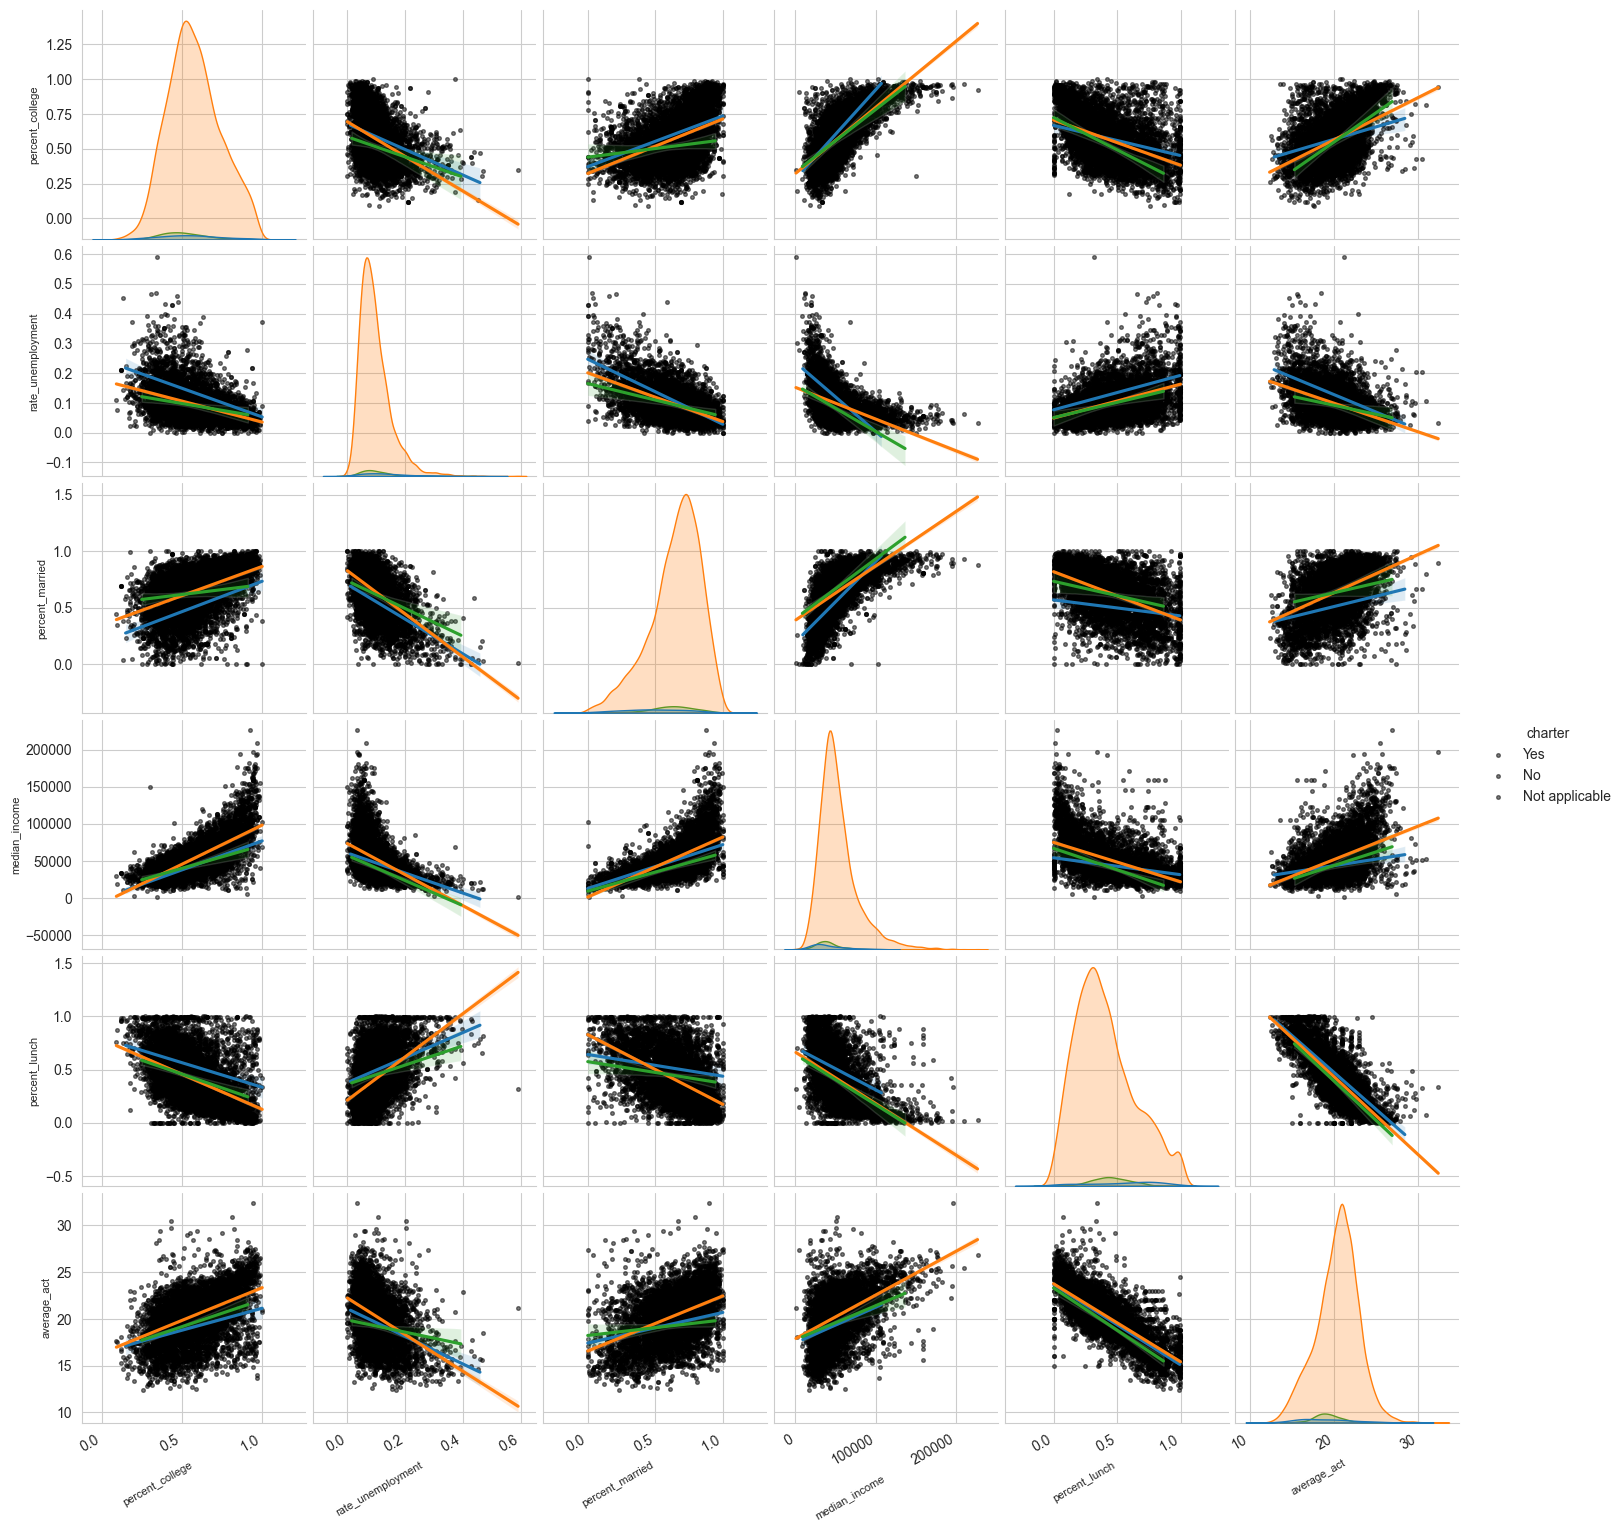

In [43]:
fig = sns.pairplot(data=df, vars=numerical_predictors + ['average_act'], hue='charter', kind='reg', plot_kws={"scatter_kws":{"alpha":0.5, "color":"k", "s":7}})

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

**Interpretation:** Pairplot plots the relationship between numerical predictors and target variable average_act.

Positive correaltions with average_act:
median_income, percent_college, percent_married.
Negative Correlation with average_act:
rate_unemployment, percent_lunch

It looks like relationship doesnt show any significant change between charter and non charter schools.

**BoxPlots:**

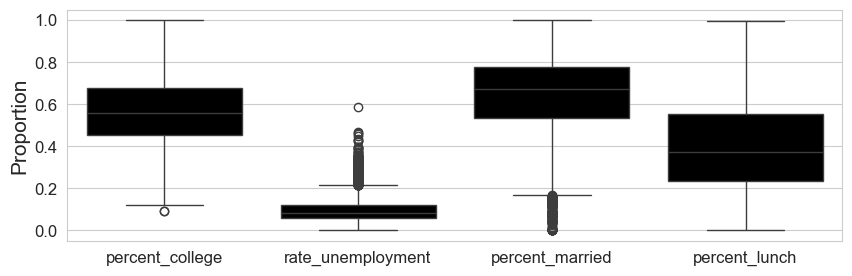

In [44]:
plt.figure(figsize=(10, 3))

fractions = list(numerical_predictors)
fractions.remove('median_income')

sns.boxplot(data=df[fractions], color='k')

plt.ylabel('Proportion', fontsize=15)

plt.tick_params(labelsize=12)

plt.show()

**Interpretation:** 
percent_college: 40% - 70%, high college education with no outliers
rate_unemployment:  low unemploynment_rate with outliers and the outliers are not far away from the data.
percent_married: 60%-80%, high marraiage rate with outliers and the outliers are not far away from the data.
 

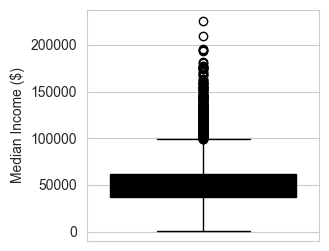

In [45]:
plt.figure(figsize=(3, 3))
sns.boxplot(data=df, y ='median_income', color='k')
plt.ylabel('Median Income ($)')
plt.show()

**Interpretation:** The median house hold income is around $70K and there are outliers which is predictable with some higher income people. 

# Pre-Class 4 Work

## Modeling:
### Single input models

Median income

Before: Ploting the regression line and the scatter plot to visualize relationship between `median income` and `average ACT score`

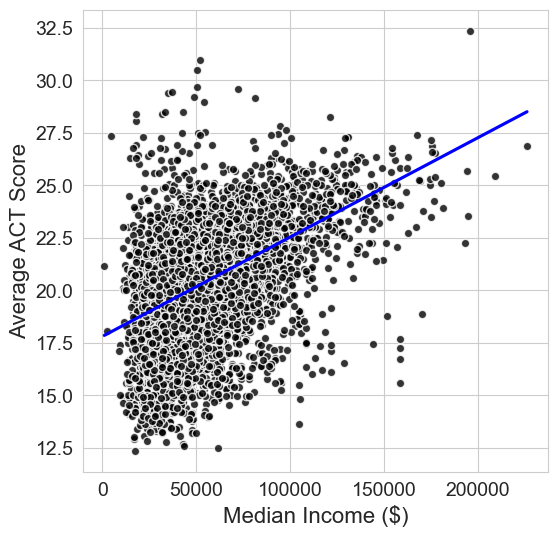

In [46]:
plt.figure(figsize=(6,6))

sns.regplot(data=df, x='median_income', y='average_act', color='blue', ci=False, scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths': 1})

# Add axis labels
plt.xlabel('Median Income ($)', fontsize=16)
plt.ylabel('Average ACT Score', fontsize=16)

# Increase the fontsize of tick labels
plt.tick_params(labelsize=14)

plt.show()

After: Interpretation: Inspected the points around the line which shows linear and upward trend which supports linear modeling

Before: Fiting the simple linear regression model of `average ACT` on `median_income`

In [47]:
model_median_income = smf.ols('average_act ~ median_income', data=df).fit()

After: The regression model is succesfully fitted which show the relationship between average ACT score and median income

Before: Displaying the fit summary

In [48]:
print(model_median_income.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     1934.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        14:46:33   Log-Likelihood:                -16043.
No. Observations:                7227   AIC:                         3.209e+04
Df Residuals:                    7225   BIC:                         3.210e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.8026      0.063    284.794

After: The R-squared is 0.211 with intercept 17.80 and median_income coefficient as 4.732e-05 and p-value is 0.000 whcih indicates as highly significant. 

Numerical assessment of fit accuracy

Before: Compute the R-squared

In [49]:
model_median_income.rsquared

0.21118648979300636

After: It displays the R-squared value as 0.21186. The more R-squared is close to 1 the more the model is best fit, in this case it is giving a hint to us to include other predictors also into the model.  

Compute RMSE

Before: Computing predictions `y-hat` for the income only model

In [50]:
y_hat = model_median_income.predict()

Before: Calculating the RMSE(Sqaure root of MSE) for the income only model

In [51]:
np.sqrt(mean_squared_error(df['average_act'], y_hat)).round(3)

2.228

After: RMSE is 2.228, which means prediction differs by 2.228 ACT points 

Before: Compute the mean absolute error for income only model

In [52]:
mean_absolute_error(df['average_act'], y_hat)

1.7129386980688601

After: Mean absolute error is 1.7129

Before: Using a residual plot for graphical assesment of model fit

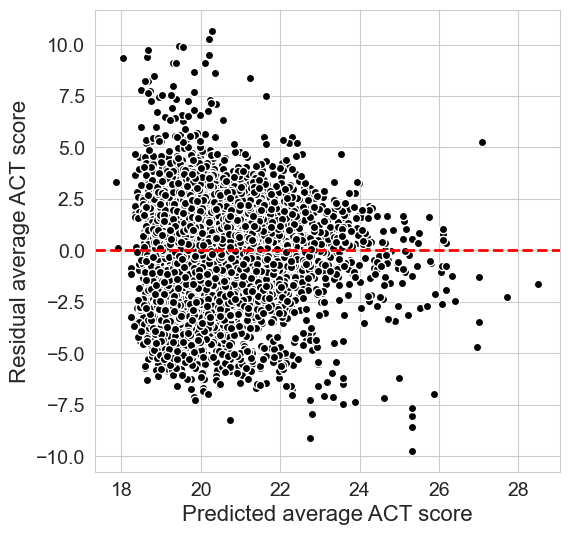

In [53]:
plt.figure(figsize=(6, 6))

plt.plot(y_hat, model_median_income.resid, 'ko', mec='w')
plt.axhline(0, color='r', ls='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

After: The residual plot shows points scattered around horizontal zero line and suggesting as linear model sufficient.

Before: Trying a quadratic model. Ploting the regression curves and the scatter plot

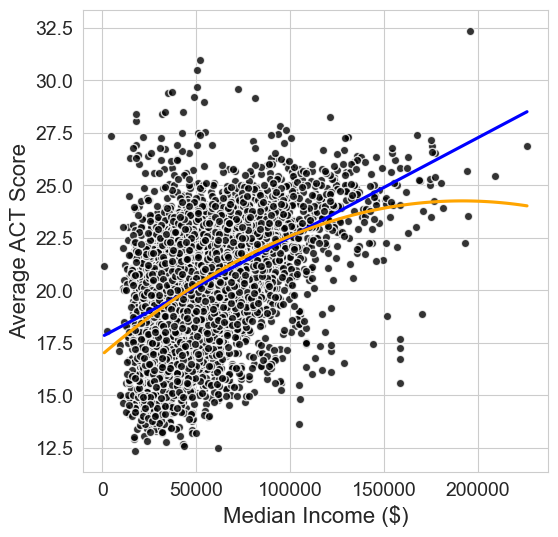

In [54]:
plt.figure(figsize=(6,6))

sns.regplot(data=df, x='median_income', y='average_act', color='blue', ci=False, scatter_kws={'color': 'black', 'edgecolors': 'white', 'linewidths':1})

sns.regplot(data=df, x='median_income', y='average_act', color='orange', ci=False, scatter=False, order=2)

# Add axis labels
plt.xlabel('Median Income ($)', fontsize=16)
plt.ylabel('Average ACT Score', fontsize=16)

# Increase the fontsize of tick labels
plt.tick_params(labelsize=14)

plt.show()

After: Looks like the orange curve fits slighly better, in this case ACT score increases with increase in income but level off at higher income.Hence slightly indicates possible non linear relationship.

Before: Fiting a quadratic linear regression model

In [55]:
model_median_income2 = smf.ols('average_act ~ median_income + I(median_income ** 2)', data=df).fit()


After: The regression model successfully fitted

Before: Display Fit summary

In [56]:
print(model_median_income2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     1013.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:05:12   Log-Likelihood:                -16007.
No. Observations:                7227   AIC:                         3.202e+04
Df Residuals:                    7224   BIC:                         3.204e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                16.94

After: This model has slight higher R-Squared compared to the previous model, which says the median income square is significant which indicates better fit compared to previous model fit.

Before: Assessing the model significance

In [57]:
model_median_income2.pvalues

Intercept                0.000000e+00
median_income            2.631899e-99
I(median_income ** 2)    1.395848e-17
dtype: float64

After: The p-values for both median_income and median income square are quite small, which mean quadratic terms makes a meanigful contribution in explaining the variation of ACT score

Before: ANOVA F-test to compare linear and quadratic models

In [59]:
anova_lm(model_median_income, model_median_income2)

df_resid           ssr  df_diff     ss_diff          F        Pr(>F)
0    7225.0  35865.012794      0.0         NaN        NaN           NaN
1    7224.0  35505.105960      1.0  359.906834  73.227974  1.395848e-17

After: small p-values indicates quadratic model slightly better fit than linear model 

Before: Compute the mean absolute error

In [60]:
mean_absolute_error(df['average_act'], model_median_income2.predict())

1.6972389257620035

After: MAE=1.69 show small improvement compared to linear model's MAE=1.713

Before: Compare the quadratic model accuracy to the first order model

In [61]:
mean_absolute_error(df['average_act'], model_median_income2.predict())

1.6972389257620035

In [62]:
mean_absolute_error(df['average_act'], model_median_income.predict())

1.7129386980688601

After: MAE=1.69 show quadratic model has small improvement compared to linear model (MAE=1.713)

## Multiple linear regression

Before: Fit the multiple linear regression model using all socioeconomic variables as predictors

In [63]:
model = smf.ols('average_act ~ rate_unemployment + percent_college + percent_married + median_income + percent_lunch', data=df).fit()

After: Successfully Fitted multiple linear regression with sociaeconomic predictors `rate_unemployment`, `precent_college`, `precent_married`, `median_income`, `precent_lunch`

Before: Print the summary

In [64]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     2438.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:18:33   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.667e+04
Df Residuals:                    7221   BIC:                         2.671e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6972      0.13

After: R-Squared= 0.628 which a significant improvement in model fit compared to income only linear and quadratic models. 
Cofficient on `percent_income` and `median_income` has relativily large P values which indicates they are not statistically significant. we might dont need all predictors in single model

Before: Using a residual plot for graphical assesment of model fit

In [65]:
y_hat = model.predict()

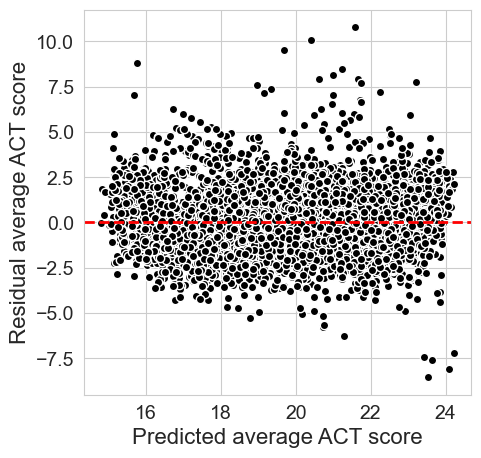

In [66]:
plt.figure(figsize=(5,5))

plt.plot(y_hat, model.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

After: Relatively no structure which unlikely to improve model by making transformations of input variables we used.

Before: Computing the mean absolute error

In [67]:
mean_absolute_error(df['average_act'], model.predict())

1.1453304788886212

After: MAE is less than individual predictor models

After: Fiting a reduced model with the significant predictors

In [68]:
model_reduced = smf.ols(formula='average_act ~ rate_unemployment + percent_college + percent_lunch', data=df).fit()

After: Successfully fitted model with significant predictors like `rate_unemployment`, `percent_college`, `percent_lunch`

Before: Print the summary

In [69]:
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     4063.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:33:04   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7223   BIC:                         2.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6400      0.10

After: All three variables have statistically significant coefficients and R-squared remain same that these predictors are the accurate predictors with statistical significance

Before: Using a residual plot for graphical assesment of model fit

In [71]:
y_hat = model_reduced.predict()

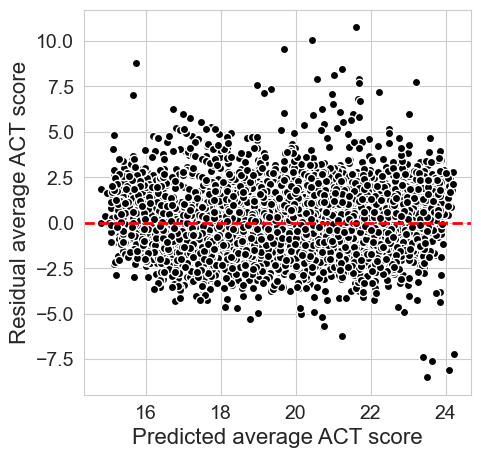

In [72]:
plt.figure(figsize=(5,5))

plt.plot(y_hat, model_reduced.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

After: The residual plot shows the points are scattered around the zero line which shows model fits the data well.

Before: Compute the mean absolute error

In [73]:
mean_absolute_error(df['average_act'], model_reduced.predict())

1.1454832950346416

After: MAE is 1.14 which show Multiple linear regression with significant predictors is same as full predictor Multiple and is better than single linear regression models

Compare the accuracy between full and reduced models

In [74]:
mae_full = mean_absolute_error(df['average_act'], model.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_full = model.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_full, mae_reduced],
                'R-squared': [r2_full, r2_reduced]},
                index=['Full Model', 'Reduced Model']).round(4)

Mean Absolute Error  R-squared
Full Model                  1.1453     0.6280
Reduced Model               1.1455     0.6279

After: Full Model and Reduced model has same MAE, favoring significant predictor model

Using an ANOVA to test the significance of difference between models

In [75]:
anova_lm(model_reduced, model)

df_resid           ssr  df_diff   ss_diff         F    Pr(>F)
0    7223.0  16916.619167      0.0       NaN       NaN       NaN
1    7221.0  16915.612457      2.0  1.006711  0.214874  0.806648

### Scaling

Before: Scaling the predictor variables in the reduced model to have mean 0 and standard deviation 1 and add them to the data frame

In [76]:
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_lunch']

After: Defining which predictors to standardize

Before: Creating names for standardized columns

In [77]:
scaled_column = [var + '_normalized' for var in predictor_variables]
print(scaled_column)

['rate_unemployment_normalized', 'percent_college_normalized', 'percent_lunch_normalized']


After: This keeps both origibnal and scaled versions in a DataFrame

Before: Fitting StandardScaler on selected predictors

In [78]:
scaler = StandardScaler().fit(df[predictor_variables])

Before: Applying the scaler abd writing standardized columns into DataFrame `df`

In [79]:
df[scaled_column] = scaler.transform(df[predictor_variables])

After: standardized values exists in new columns that ends with `_normalized`

Before: Checking the mean and standard deviation of the transformed data

In [80]:
df[scaled_column].agg(['mean', 'std']).round(3)

rate_unemployment_normalized  percent_college_normalized  \
mean                          -0.0                        -0.0   
std                            1.0                         1.0   

      percent_lunch_normalized  
mean                      -0.0  
std                        1.0

After: Mean is 0 and standard deviation is 1 which confirms scaling

Before: Fit the multiple linear regression model with the normalized predictors

In [81]:
model_normalized = smf.ols('average_act ~ rate_unemployment_normalized + percent_college_normalized + percent_lunch_normalized', data=df).fit()

After: Fitting is successfull

Before: Print the summary

In [82]:
print(model_normalized.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     4063.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        15:55:30   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7223   BIC:                         2.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

After: Precent of students at school recieving free or reduced price lunch is the strongest predictor in the analysis. Notice that R-squared remanin same which means scalling doesn't change R-Squared value

Before: Comparing the accuracy between the original and normalized models

In [83]:
mae_normalized = mean_absolute_error(df['average_act'], model_normalized.predict())
mae_reduced = mean_absolute_error(df['average_act'], model_reduced.predict())

r2_normalized = model_normalized.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Absolute Error': [mae_normalized, mae_reduced],
                'R-squared': [r2_normalized, r2_reduced]},
                index=['Normalized Model', 'Reduced Model']).round(4)

Mean Absolute Error  R-squared
Normalized Model               1.1455     0.6279
Reduced Model                  1.1455     0.6279

After: MAE and R-Squared remain same.